## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score   
from math import sqrt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a = -1
b = 2
x = np.linspace(0,20)
y = a * x + b

In [3]:
print("x=",x)
print("y=",y)

x= [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
y= [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -

#### Plot your data points. 

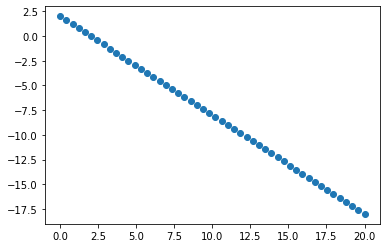

In [4]:
plt.scatter(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [5]:
def Adagrad (x, y, alpha, v0, v1, epoch):
    theta_0 = 0
    theta_1 = 0
    epsilon = 1e-8

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    v0_list = []
    v1_list = []
    hypothesis = np.zeros(len(x))
    
    for i in range (epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        v0 = v0 + (gradiant_theta0 ** 2)
        v0_list.append(v0)
        theta_0 = theta_0 - ((alpha / (epsilon + sqrt(v0))) * gradiant_theta0)
        theta0_values.append(theta_0)
        
        v1 = v1 + (gradiant_theta1 ** 2)
        v1_list.append(v1)
        theta_1 = theta_1 - ((alpha / (epsilon + sqrt(v1))) * gradiant_theta1)
        theta1_values.append(theta_1)
                             
        if (i > 0) & (abs(cost_function[i-1] - cost_function[i]) < 0.01):
          print("Stoped after {} iteration\n".format(i+1))
          break
        elif(i == epoch-1):
          print("Stoped after {} iteration\n".format(i+1))
    
        
    print("optimum theta0: ", theta0_values[-1], "\noptimum theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [6]:
alpha = 0.05
v0 = 0
v1 = 0
epoch = 10000

theta0_adagrad, theta1_adagrad, losses_adagrad, hypo_adagrad = Adagrad (x, y, alpha, v0, v1, epoch)

Stoped after 8339 iteration

optimum theta0:  1.7687304311742937 
optimum theta1:  -0.9824256399606288 
last losses:  17.25826323441525 
last hypothesis:  [  1.76866347   1.36767549   0.96668751   0.56569953   0.16471155
  -0.23627643  -0.63726441  -1.03825239  -1.43924037  -1.84022835
  -2.24121633  -2.64220431  -3.04319229  -3.44418027  -3.84516825
  -4.24615623  -4.64714421  -5.04813219  -5.44912017  -5.85010815
  -6.25109613  -6.65208411  -7.05307209  -7.45406007  -7.85504805
  -8.25603603  -8.65702401  -9.05801199  -9.45899997  -9.85998795
 -10.26097593 -10.66196391 -11.06295189 -11.46393987 -11.86492785
 -12.26591583 -12.66690381 -13.06789179 -13.46887977 -13.86986775
 -14.27085573 -14.67184371 -15.07283169 -15.47381967 -15.87480765
 -16.27579563 -16.67678361 -17.07777159 -17.47875957 -17.87974756]


In [7]:
print("R2Score: ", r2_score(y,hypo_adagrad[-1]))

R2Score:  0.9996020447536534


Text(0.5, 1.0, 'losses over epochs for Adagrad')

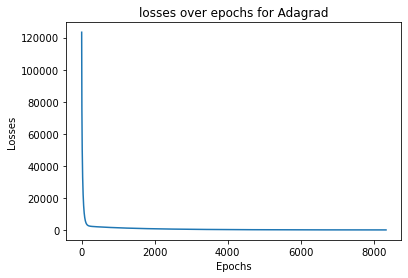

In [13]:
plt.plot(losses_adagrad)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("losses over epochs for Adagrad")

Text(0.5, 1.0, 'theta0 and losses for Adagrad')

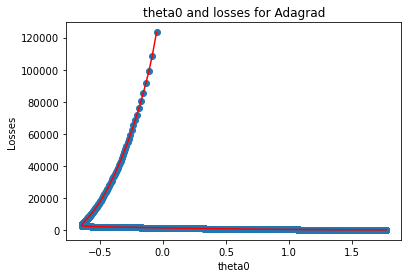

In [14]:
plt.plot(theta0_adagrad, losses_adagrad,'r')
plt.scatter(theta0_adagrad, losses_adagrad)
plt.xlabel('theta0')
plt.ylabel('Losses')
plt.title("theta0 and losses for Adagrad")

Text(0.5, 1.0, 'theta1 and losses for Adagrad')

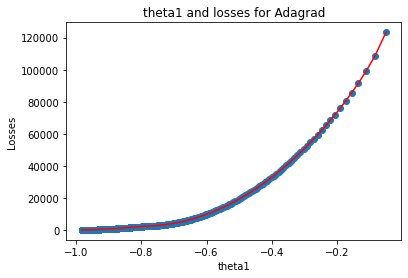

In [15]:
plt.plot(theta1_adagrad, losses_adagrad,'r')
plt.scatter(theta1_adagrad, losses_adagrad)
plt.xlabel('theta1')
plt.ylabel('Losses')
plt.title("theta1 and losses for Adagrad")

Text(0.5, 1.0, 'all fitted lines per epoch for Adagrad')

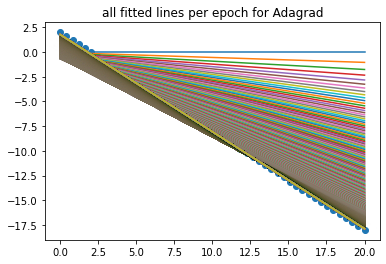

In [37]:
for  i in range(len(hypo_adagrad)):
    plt.plot(x,hypo_adagrad[i])
plt.scatter(x,y)
plt.title("all fitted lines per epoch for Adagrad")

Text(0.5, 1.0, 'best fitted line for Adagrad')

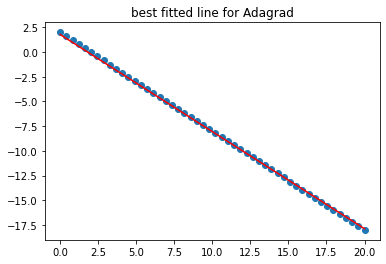

In [16]:
best_hypo = hypo_adagrad[-1]
plt.scatter(x,y)
plt.plot(x, best_hypo,'r')
plt.title("best fitted line for Adagrad")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [17]:
def RMSprop (x, y, alpha, beta, v0, v1, epoch):
    theta_0 = 0
    theta_1 = 0
    epsilon = 1e-8

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    v0_list = []
    v1_list = []
    hypothesis = np.zeros(len(x))
    
    for i in range (epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        v0 = beta * v0 + (1 - beta) * (gradiant_theta0 ** 2)
        v0_list.append(v0)
        
        theta_0 = theta_0 - ((alpha / (epsilon + sqrt(v0))) * gradiant_theta0)
        theta0_values.append(theta_0)
        
        v1 = beta * v1 + (1 - beta) * (gradiant_theta1 ** 2)
        v1_list.append(v1)
        
        theta_1 = theta_1 - ((alpha / (epsilon + sqrt(v1))) * gradiant_theta1)
        theta1_values.append(theta_1)
                             
        if (i > 0) & (abs(cost_function[i-1] - cost_function[i]) < 0.01):
          print("Stoped after {} iteration\n".format(i+1))
          break
        elif(i == epoch-1):
          print("Stoped after {} iteration\n".format(i+1))
    
        
    print("optimum theta0: ", theta0_values[-1], "\noptimum theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [18]:
alpha = 0.05
beta = 0.9
v0 = 0
v1 = 0
epoch = 10000

theta0_rms, theta1_rms, losses_rms, hypo_rms = RMSprop (x, y, alpha, beta, v0, v1, epoch)

Stoped after 228 iteration

optimum theta0:  2.0235940293247188 
optimum theta1:  -0.9749404971709892 
last losses:  121.10948548852221 
last hypothesis:  [  1.97363368   1.55533254   1.1370314    0.71873026   0.30042912
  -0.11787202  -0.53617315  -0.95447429  -1.37277543  -1.79107657
  -2.20937771  -2.62767885  -3.04597999  -3.46428113  -3.88258226
  -4.3008834   -4.71918454  -5.13748568  -5.55578682  -5.97408796
  -6.3923891   -6.81069024  -7.22899137  -7.64729251  -8.06559365
  -8.48389479  -8.90219593  -9.32049707  -9.73879821 -10.15709935
 -10.57540048 -10.99370162 -11.41200276 -11.8303039  -12.24860504
 -12.66690618 -13.08520732 -13.50350846 -13.92180959 -14.34011073
 -14.75841187 -15.17671301 -15.59501415 -16.01331529 -16.43161643
 -16.84991756 -17.2682187  -17.68651984 -18.10482098 -18.52312212]


In [19]:
print("R2Score: ", r2_score(y,hypo_rms[-1]))

R2Score:  0.9972073577463824


Text(0.5, 1.0, 'losses over epochs for Rms')

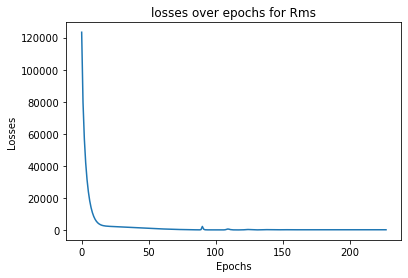

In [21]:
plt.plot(losses_rms)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("losses over epochs for Rms")

Text(0.5, 1.0, 'theta0 and losses for Rms')

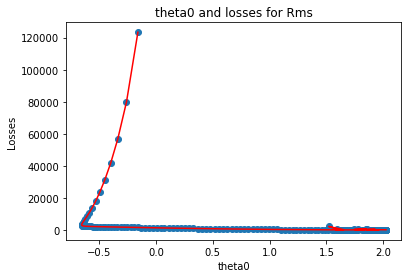

In [22]:
plt.plot(theta0_rms, losses_rms, 'r')
plt.scatter(theta0_rms,losses_rms)
plt.xlabel('theta0')
plt.ylabel('Losses')
plt.title("theta0 and losses for Rms")

Text(0.5, 1.0, 'theta1 and losses for Rms')

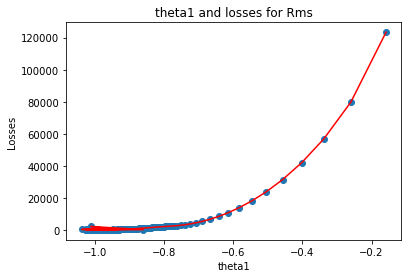

In [23]:
plt.plot(theta1_rms, losses_rms, 'r')
plt.scatter(theta1_rms,losses_rms)
plt.xlabel('theta1')
plt.ylabel('Losses')
plt.title("theta1 and losses for Rms")

Text(0.5, 1.0, 'all fitted lines per epoch for Rms')

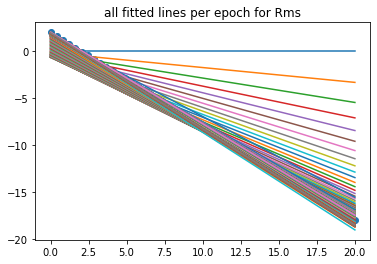

In [36]:
for  i in range(len(hypo_rms)):
    plt.plot(x,hypo_rms[i])
plt.scatter(x,y)
plt.title("all fitted lines per epoch for Rms")

Text(0.5, 1.0, 'best fitted line for Rms')

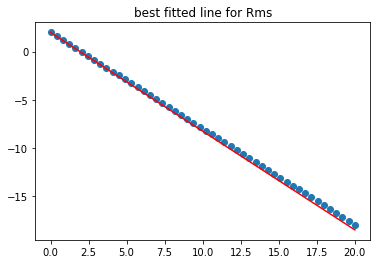

In [25]:
best_hypo = hypo_rms[-1]
plt.plot(x,best_hypo,'r')
plt.scatter(x,y)
plt.title("best fitted line for Rms")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [26]:
def Adam (x, y, alpha, beta1, beta2, m0, m1, v0, v1, epsilon, epoch):
    theta_0 = 0
    theta_1 = 0

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    hypothesis = np.zeros(len(x))
    
    for i in range (1, epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        m0 = (beta1 * m0) + ((1 - beta1) * gradiant_theta0)
        m0_new = m0 / (1 - (beta1 ** i))
        
        v0 = (beta2 * v0) + ((1 - beta2) * (gradiant_theta0 ** 2))
        v0_new = v0 / (1 - (beta2 ** i))
        
        theta_0 = theta_0 - ((alpha / (epsilon + sqrt(v0_new))) * m0_new)
        theta0_values.append(theta_0)
        
        m1 = (beta1 * m1) + ((1 - beta1) * gradiant_theta1)
        m1_new = m1 / (1 - (beta1 ** i))
        
        v1 = (beta2 * v1) + ((1 - beta2) * (gradiant_theta1 ** 2))
        v1_new = v1 / (1 - (beta2 ** i))
        
        theta_1 = theta_1 - ((alpha / (epsilon + sqrt(v1_new))) * m1_new)
        theta1_values.append(theta_1)
                             
        if (cost < 0.05):
            final_epoch = i
            print("final epoch= ",final_epoch)
            break
    
        
    print("optimum theta0: ", theta0_values[-1], "\noptimum theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [27]:
alpha = 0.05
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
v0 = 0
v1 = 0
m0 = 0
m1 = 0
epoch = 10000

theta0_adam, theta1_adam, losses_adam, hypo_adam = Adam (x, y, alpha, beta1, beta2, m0, m1, v0, v1, epsilon, epoch)

final epoch=  522
optimum theta0:  1.9879429491161027 
optimum theta1:  -0.999082735204722 
last losses:  0.04855817515594399 
last hypothesis:  [  1.98773008   1.57994782   1.17216555   0.76438329   0.35660103
  -0.05118123  -0.45896349  -0.86674575  -1.27452801  -1.68231028
  -2.09009254  -2.4978748   -2.90565706  -3.31343932  -3.72122158
  -4.12900384  -4.53678611  -4.94456837  -5.35235063  -5.76013289
  -6.16791515  -6.57569741  -6.98347967  -7.39126194  -7.7990442
  -8.20682646  -8.61460872  -9.02239098  -9.43017324  -9.8379555
 -10.24573777 -10.65352003 -11.06130229 -11.46908455 -11.87686681
 -12.28464907 -12.69243133 -13.1002136  -13.50799586 -13.91577812
 -14.32356038 -14.73134264 -15.1391249  -15.54690717 -15.95468943
 -16.36247169 -16.77025395 -17.17803621 -17.58581847 -17.99360073]


In [28]:
print("R2Score: ", r2_score(y,hypo_adam[-1]))

R2Score:  0.9999988803056081


Text(0.5, 1.0, 'losses over epochs for Adam')

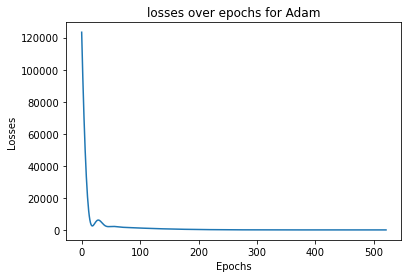

In [30]:
plt.plot(losses_adam)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("losses over epochs for Adam")

Text(0.5, 1.0, 'theta0 and losses for Adam')

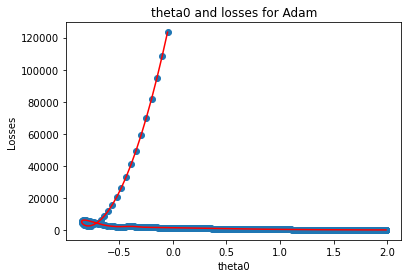

In [31]:
plt.plot(theta0_adam, losses_adam, 'r')
plt.scatter(theta0_adam,losses_adam)
plt.xlabel('theta0')
plt.ylabel('Losses')
plt.title("theta0 and losses for Adam")

Text(0.5, 1.0, 'theta1 and losses for Adam')

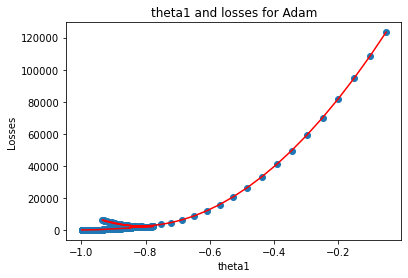

In [32]:
plt.plot(theta1_adam, losses_adam, 'r')
plt.scatter(theta1_adam,losses_adam)
plt.xlabel('theta1')
plt.ylabel('Losses')
plt.title("theta1 and losses for Adam")

Text(0.5, 1.0, 'all fitted lines per epoch for Adam')

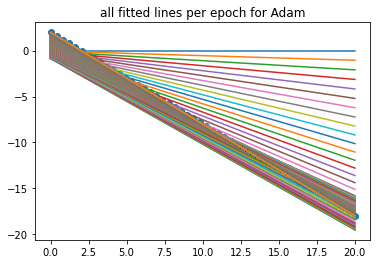

In [35]:
for  i in range(len(hypo_adam)):
    plt.plot(x,hypo_adam[i])
plt.scatter(x,y)
plt.title("all fitted lines per epoch for Adam")

Text(0.5, 1.0, 'best fitted line for Adam')

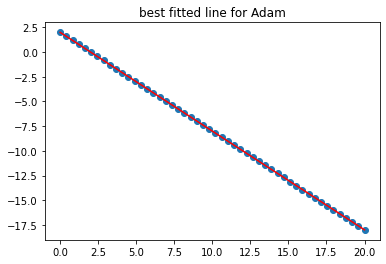

In [33]:
best_hypo = hypo_adam[-1]
plt.plot(x, best_hypo,'r')
plt.scatter(x,y)
plt.title("best fitted line for Adam")

## all above optimizations are implemented for the same parameters ...

## using different parameters for the three types of optimizations:

In [43]:
##### Adagrad #####

alpha = 0.1
v0 = 0
v1 = 1
epoch = 5000

theta0_adagrad1, theta1_adagrad1, losses_adagrad1, hypo_adagrad1 = Adagrad (x, y, alpha, v0, v1, epoch)

Stoped after 2975 iteration

optimum theta0:  1.8774203337912978 
optimum theta1:  -0.990682821345597 
last losses:  4.855711921410408 
last hypothesis:  [  1.87729428   1.47293786   1.06858143   0.66422501   0.25986858
  -0.14448784  -0.54884427  -0.95320069  -1.35755711  -1.76191354
  -2.16626996  -2.57062639  -2.97498281  -3.37933924  -3.78369566
  -4.18805209  -4.59240851  -4.99676494  -5.40112136  -5.80547778
  -6.20983421  -6.61419063  -7.01854706  -7.42290348  -7.82725991
  -8.23161633  -8.63597276  -9.04032918  -9.4446856   -9.84904203
 -10.25339845 -10.65775488 -11.0621113  -11.46646773 -11.87082415
 -12.27518058 -12.679537   -13.08389343 -13.48824985 -13.89260627
 -14.2969627  -14.70131912 -15.10567555 -15.51003197 -15.9143884
 -16.31874482 -16.72310125 -17.12745767 -17.53181409 -17.93617052]


In [44]:
print("R2Score: ", r2_score(y,hypo_adagrad1[-1]))

R2Score:  0.9998880329956945


Text(0.5, 1.0, 'losses over epochs for Adagrad')

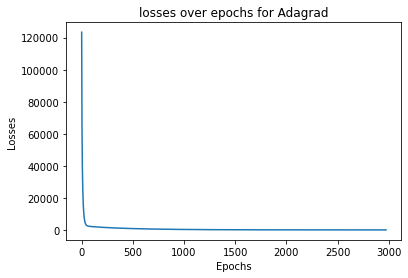

In [45]:
plt.plot(losses_adagrad1)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("losses over epochs for Adagrad")

Text(0.5, 1.0, 'theta0 and losses for Adagrad')

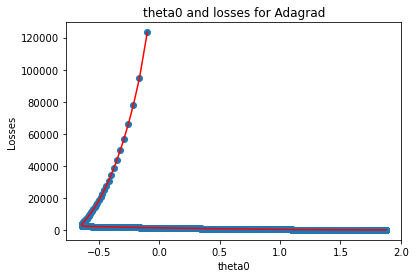

In [46]:
plt.plot(theta0_adagrad1, losses_adagrad1,'r')
plt.scatter(theta0_adagrad1, losses_adagrad1)
plt.xlabel('theta0')
plt.ylabel('Losses')
plt.title("theta0 and losses for Adagrad")

Text(0.5, 1.0, 'theta1 and losses for Adagrad')

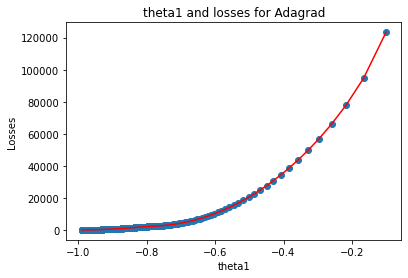

In [47]:
plt.plot(theta1_adagrad1, losses_adagrad1,'r')
plt.scatter(theta1_adagrad1, losses_adagrad1)
plt.xlabel('theta1')
plt.ylabel('Losses')
plt.title("theta1 and losses for Adagrad")

Text(0.5, 1.0, 'all fitted lines per epoch for Adagrad')

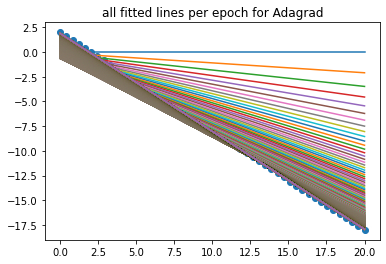

In [48]:
for  i in range(len(hypo_adagrad1)):
    plt.plot(x,hypo_adagrad1[i])
plt.scatter(x,y)
plt.title("all fitted lines per epoch for Adagrad")

Text(0.5, 1.0, 'best fitted line for Adagrad')

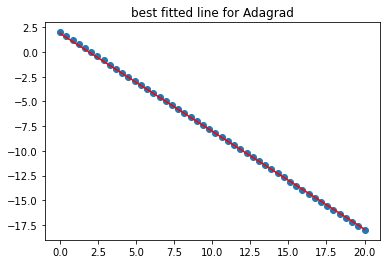

In [49]:
best_hypo = hypo_adagrad1[-1]
plt.scatter(x,y)
plt.plot(x, best_hypo,'r')
plt.title("best fitted line for Adagrad")

In [52]:
#### RMS PROP #####

alpha = 0.1
beta = 0.5
v0 = 0
v1 = 1
epoch = 500

theta0_rms1, theta1_rms1, losses_rms1, hypo_rms1 = RMSprop (x, y, alpha, beta, v0, v1, epoch)

Stoped after 169 iteration

optimum theta0:  1.9278844300826146 
optimum theta1:  -1.0483184604591709 
last losses:  486.70591766169116 
last hypothesis:  [  2.02721208   1.64016397   1.25311585   0.86606774   0.47901963
   0.09197152  -0.2950766   -0.68212471  -1.06917282  -1.45622093
  -1.84326905  -2.23031716  -2.61736527  -3.00441338  -3.3914615
  -3.77850961  -4.16555772  -4.55260583  -4.93965395  -5.32670206
  -5.71375017  -6.10079828  -6.4878464   -6.87489451  -7.26194262
  -7.64899073  -8.03603885  -8.42308696  -8.81013507  -9.19718318
  -9.5842313   -9.97127941 -10.35832752 -10.74537563 -11.13242375
 -11.51947186 -11.90651997 -12.29356808 -12.6806162  -13.06766431
 -13.45471242 -13.84176053 -14.22880865 -14.61585676 -15.00290487
 -15.38995298 -15.7770011  -16.16404921 -16.55109732 -16.93814543]


In [53]:
print("R2Score: ", r2_score(y,hypo_rms1[-1]))

R2Score:  0.9887771341339187


Text(0.5, 1.0, 'losses over epochs for Rms')

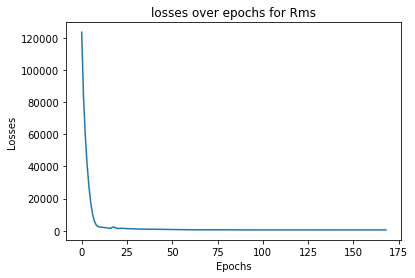

In [54]:
plt.plot(losses_rms1)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("losses over epochs for Rms")

Text(0.5, 1.0, 'theta0 and losses for Rms')

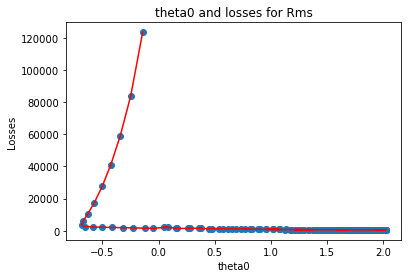

In [55]:
plt.plot(theta0_rms1, losses_rms1, 'r')
plt.scatter(theta0_rms1,losses_rms1)
plt.xlabel('theta0')
plt.ylabel('Losses')
plt.title("theta0 and losses for Rms")

Text(0.5, 1.0, 'theta1 and losses for Rms')

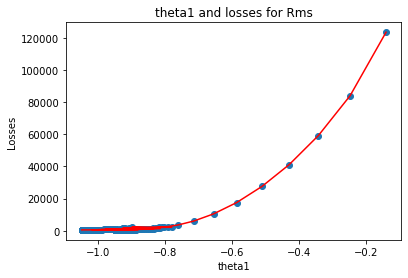

In [56]:
plt.plot(theta1_rms1, losses_rms1, 'r')
plt.scatter(theta1_rms1,losses_rms1)
plt.xlabel('theta1')
plt.ylabel('Losses')
plt.title("theta1 and losses for Rms")

Text(0.5, 1.0, 'all fitted lines per epoch for Rms')

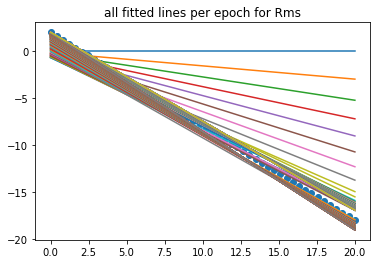

In [57]:
for  i in range(len(hypo_rms1)):
    plt.plot(x,hypo_rms1[i])
plt.scatter(x,y)
plt.title("all fitted lines per epoch for Rms")

Text(0.5, 1.0, 'best fitted line for Rms')

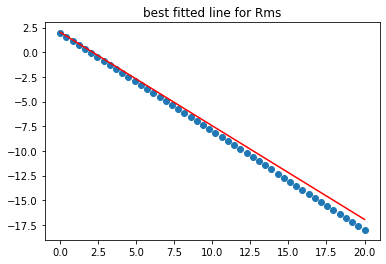

In [59]:
best_hypo = hypo_rms1[-1]
plt.plot(x,best_hypo,'r')
plt.scatter(x,y)
plt.title("best fitted line for Rms")

In [61]:
##### Adam ####

alpha = 0.1
beta1 = 0.5
beta2 = 0.5
epsilon = 1e-8
v0 = 0
v1 = 1
m0 = 0
m1 = 1
epoch = 500

theta0_adam1, theta1_adam1, losses_adam1, hypo_adam1 = Adam (x, y, alpha, beta1, beta2, m0, m1, v0, v1, epsilon, epoch)

final epoch=  178
optimum theta0:  1.980293360414975 
optimum theta1:  -1.0197066421525351 
last losses:  0.021992224825236134 
last hypothesis:  [  2.00033616   1.5923101    1.18428404   0.77625799   0.36823193
  -0.03979413  -0.44782019  -0.85584625  -1.2638723   -1.67189836
  -2.07992442  -2.48795048  -2.89597653  -3.30400259  -3.71202865
  -4.12005471  -4.52808077  -4.93610682  -5.34413288  -5.75215894
  -6.160185    -6.56821106  -6.97623711  -7.38426317  -7.79228923
  -8.20031529  -8.60834135  -9.0163674   -9.42439346  -9.83241952
 -10.24044558 -10.64847163 -11.05649769 -11.46452375 -11.87254981
 -12.28057587 -12.68860192 -13.09662798 -13.50465404 -13.9126801
 -14.32070616 -14.72873221 -15.13675827 -15.54478433 -15.95281039
 -16.36083645 -16.7688625  -17.17688856 -17.58491462 -17.99294068]


In [62]:
print("R2Score: ", r2_score(y,hypo_adam1[-1]))

R2Score:  0.9999994928851688


Text(0.5, 1.0, 'losses over epochs for Adam')

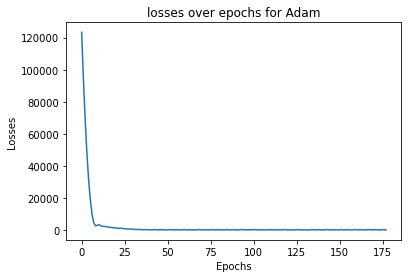

In [63]:
plt.plot(losses_adam1)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("losses over epochs for Adam")

Text(0.5, 1.0, 'theta0 and losses for Adam')

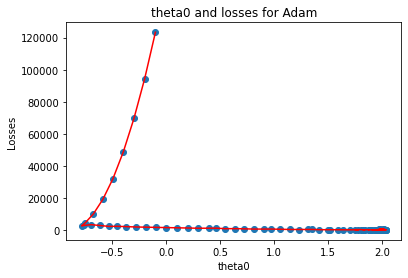

In [64]:
plt.plot(theta0_adam1, losses_adam1, 'r')
plt.scatter(theta0_adam1,losses_adam1)
plt.xlabel('theta0')
plt.ylabel('Losses')
plt.title("theta0 and losses for Adam")

Text(0.5, 1.0, 'theta1 and losses for Adam')

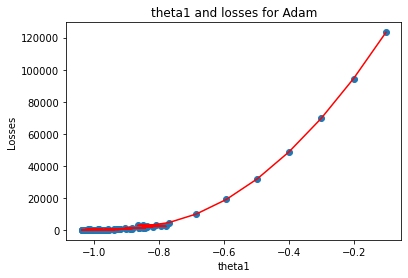

In [65]:
plt.plot(theta1_adam1, losses_adam1, 'r')
plt.scatter(theta1_adam1,losses_adam1)
plt.xlabel('theta1')
plt.ylabel('Losses')
plt.title("theta1 and losses for Adam")

Text(0.5, 1.0, 'all fitted lines per epoch for Adam')

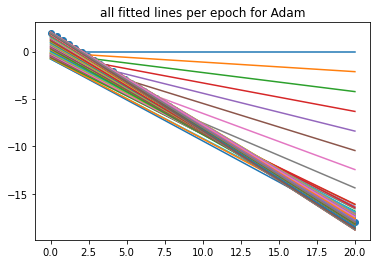

In [66]:
for  i in range(len(hypo_adam1)):
    plt.plot(x,hypo_adam1[i])
plt.scatter(x,y)
plt.title("all fitted lines per epoch for Adam")

Text(0.5, 1.0, 'best fitted line for Adam')

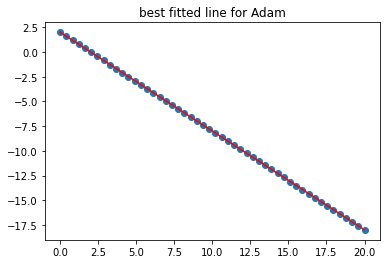

In [67]:
best_hypo = hypo_adam1[-1]
plt.plot(x, best_hypo,'r')
plt.scatter(x,y)
plt.title("best fitted line for Adam")

## Congratulations 
![image.png](attachment:image.png)